# Leetcode - similar problem and topic tag prediction


### Contents
1. [Data Extraction/Collection](#data_extraction)
2. [Basic Preprocessing](#basicprep)
3. [Data Analysis](#data_analysis)
4. [Making data ready - Predicting Similar Questions](#task1)
5. [Making data ready - Tag Prediction](#task2)

In [1]:
import requests
import pandas as pd
import json
from tqdm import tqdm
import re
base_url = "https://leetcode.com/graphql/"

<a id='data_extraction'></a> 
## Data Extraction/Collection

In [2]:
BASE_URL = "https://leetcode.com/graphql/"
QUERY = {"query":"\n    query problemsetQuestionList($categorySlug: String, $limit: Int, $skip: Int, $filters: QuestionListFilterInput) {\n  problemsetQuestionList: questionList(\n    categorySlug: $categorySlug\n    limit: $limit\n    skip: $skip\n    filters: $filters\n  ) {\n    total: totalNum\n    questions: data {\n      acRate\n      difficulty\n      freqBar\n      frontendQuestionId: questionFrontendId\n      isFavor\n      paidOnly: isPaidOnly\n      status\n      title\n      titleSlug\n      topicTags {\n        name\n        id\n        slug\n      }\n      hasSolution\n      hasVideoSolution\n    }\n  }\n}\n    ",
         "variables":{"categorySlug":"","skip":0,"limit":2214,"filters":{}}}
problems_data = requests.post(BASE_URL, json=QUERY).json()
print("Number of problems:", len(problems_data.get('data').get('problemsetQuestionList').get('questions')))

Number of problems: 2214


In [3]:
problems_data_list = problems_data.get('data').get('problemsetQuestionList').get('questions')

In [4]:
question_query = {"operationName":"questionData","variables":{"titleSlug":"longest-substring-of-one-repeating-character"},
         "query":"query questionData($titleSlug: String!) {\n  question(titleSlug: $titleSlug) {\n    questionId\n    questionFrontendId\n    boundTopicId\n    title\n    titleSlug\n    content\n    translatedTitle\n    translatedContent\n    isPaidOnly\n    difficulty\n    likes\n    dislikes\n    isLiked\n    similarQuestions\n    exampleTestcases\n    categoryTitle\n    contributors {\n      username\n      profileUrl\n      avatarUrl\n      __typename\n    }\n    topicTags {\n      name\n      slug\n      translatedName\n      __typename\n    }\n    companyTagStats\n    codeSnippets {\n      lang\n      langSlug\n      code\n      __typename\n    }\n    stats\n    hints\n    solution {\n      id\n      canSeeDetail\n      paidOnly\n      hasVideoSolution\n      paidOnlyVideo\n      __typename\n    }\n    status\n    sampleTestCase\n    metaData\n    judgerAvailable\n    judgeType\n    mysqlSchemas\n    enableRunCode\n    enableTestMode\n    enableDebugger\n    envInfo\n    libraryUrl\n    adminUrl\n    challengeQuestion {\n      id\n      date\n      incompleteChallengeCount\n      streakCount\n      type\n      __typename\n    }\n    __typename\n  }\n}\n"}
question_response = requests.post(BASE_URL, json=question_query).json()

In [7]:
def get_topics_formatted(topics_list):
    topics_retvar = []
    for topic in topics_list:
        topics_retvar.append(topic.get('name'))
    return topics_retvar

def get_slugs_and_topics(data_list):
    slugs = []
    topics = []
    for data in data_list:
        slugs.append(data.get('titleSlug'))
        topics.append(get_topics_formatted(data.get('topicTags')))
    return slugs, topics

In [8]:
slugs, topics = get_slugs_and_topics(problems_data_list)

In [9]:
def get_question_data(question_title_slug):
    row = []
    question_query = {"operationName":"questionData","variables":{"titleSlug":question_title_slug},
         "query":"query questionData($titleSlug: String!) {\n  question(titleSlug: $titleSlug) {\n    questionId\n    questionFrontendId\n    boundTopicId\n    title\n    titleSlug\n    content\n    translatedTitle\n    translatedContent\n    isPaidOnly\n    difficulty\n    likes\n    dislikes\n    isLiked\n    similarQuestions\n    exampleTestcases\n    categoryTitle\n    contributors {\n      username\n      profileUrl\n      avatarUrl\n      __typename\n    }\n    topicTags {\n      name\n      slug\n      translatedName\n      __typename\n    }\n    companyTagStats\n    codeSnippets {\n      lang\n      langSlug\n      code\n      __typename\n    }\n    stats\n    hints\n    solution {\n      id\n      canSeeDetail\n      paidOnly\n      hasVideoSolution\n      paidOnlyVideo\n      __typename\n    }\n    status\n    sampleTestCase\n    metaData\n    judgerAvailable\n    judgeType\n    mysqlSchemas\n    enableRunCode\n    enableTestMode\n    enableDebugger\n    envInfo\n    libraryUrl\n    adminUrl\n    challengeQuestion {\n      id\n      date\n      incompleteChallengeCount\n      streakCount\n      type\n      __typename\n    }\n    __typename\n  }\n}\n"}
    question_response = requests.post(BASE_URL, json=question_query).json().get('data').get('question')
    
    stats = json.loads(question_response.get('stats'))
    
    row.append(question_response.get('questionId'))
    row.append(question_response.get('title'))
    row.append(question_response.get('titleSlug'))
    row.append(question_response.get('content'))
    row.append(question_response.get('difficulty'))
    row.append(stats.get('acRate'))
    row.append(question_response.get('companyTagStats'))
    row.append(question_response.get('likes'))
    row.append(question_response.get('dislikes'))
    row.append(question_response.get('hints'))
    row.append(json.loads(question_response.get('similarQuestions')))
    row.append(stats.get('totalAcceptedRaw'))
    row.append(stats.get('totalSubmissionRaw'))
    return row

In [10]:
get_question_data('add-two-numbers')

['2',
 'Add Two Numbers',
 'add-two-numbers',
 '<p>You are given two <strong>non-empty</strong> linked lists representing two non-negative integers. The digits are stored in <strong>reverse order</strong>, and each of their nodes contains a single digit. Add the two numbers and return the sum&nbsp;as a linked list.</p>\n\n<p>You may assume the two numbers do not contain any leading zero, except the number 0 itself.</p>\n\n<p>&nbsp;</p>\n<p><strong>Example 1:</strong></p>\n<img alt="" src="https://assets.leetcode.com/uploads/2020/10/02/addtwonumber1.jpg" style="width: 483px; height: 342px;" />\n<pre>\n<strong>Input:</strong> l1 = [2,4,3], l2 = [5,6,4]\n<strong>Output:</strong> [7,0,8]\n<strong>Explanation:</strong> 342 + 465 = 807.\n</pre>\n\n<p><strong>Example 2:</strong></p>\n\n<pre>\n<strong>Input:</strong> l1 = [0], l2 = [0]\n<strong>Output:</strong> [0]\n</pre>\n\n<p><strong>Example 3:</strong></p>\n\n<pre>\n<strong>Input:</strong> l1 = [9,9,9,9,9,9,9], l2 = [9,9,9,9]\n<strong>Outp

### Note - We wont be able to extract the companies information as it is present for the leetcode and is not publically obtainable/scrapable

In [13]:
def create_dataset_raw(slugs, topics):
    data_raw = []
    for i in tqdm(range(len(slugs))):
        temp_data = get_question_data(slugs[i])
        temp_data.append(topics[i])
        data_raw.append(temp_data)
    df = pd.DataFrame(data_raw)
    return df

In [14]:
df = create_dataset_raw(slugs, topics)

100%|██████████████████████████████████████████████████████████████████████████████| 2214/2214 [21:38<00:00,  1.71it/s]


In [15]:
columns = [
    'question_id', 
    'question_title',
    'question_slug', 
    'question_text', 
    'difficulty',
    'success_rate', 
    'company_tags',
    'likes', 
    'dislikes',
    'hints', 
    'similar_questions',
    'total_accepted', 
    'total_submissions', 
    'topic_tagged_text'
    ]

In [16]:
df.columns = columns

In [17]:
df

,question_id,question_title,question_slug,question_text,difficulty,success_rate,company_tags,likes,dislikes,hints,similar_questions,total_accepted,total_submissions,topic_tagged_text
0,1,Two Sum,two-sum,<p>Given an array of integers <code>nums</code...,Easy,48.4%,None,30564,960,[A really brute force way would be to search f...,"[{'title': '3Sum', 'titleSlug': '3sum', 'diffi...",6255310,12924189,"[Array, Hash Table]"
1,2,Add Two Numbers,add-two-numbers,<p>You are given two <strong>non-empty</strong...,Medium,38.4%,None,17483,3629,[],"[{'title': 'Multiply Strings', 'titleSlug': 'm...",2644334,6888606,"[Linked List, Math, Recursion]"
2,3,Longest Substring Without Repeating Characters,longest-substring-without-repeating-characters,"<p>Given a string <code>s</code>, find the len...",Medium,32.9%,None,22404,1004,[],[{'title': 'Longest Substring with At Most Two...,3109972,9438634,"[Hash Table, String, Sliding Window]"
3,4,Median of Two Sorted Arrays,median-of-two-sorted-arrays,<p>Given two sorted arrays <code>nums1</code> ...,Hard,33.9%,None,15640,1936,[],[],1312772,3874658,"[Array, Binary Search, Divide and Conquer]"
4,5,Longest Palindromic Substring,longest-palindromic-substring,"<p>Given a string <code>s</code>, return <em>t...",Medium,31.7%,None,16733,981,[How can we reuse a previously computed palind...,"[{'title': 'Shortest Palindrome', 'titleSlug':...",1752820,5525765,"[String, Dynamic Programming]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,2316,Count Hills and Valleys in an Array,count-hills-and-valleys-in-an-array,<p>You are given a <strong>0-indexed</strong> ...,Easy,55.9%,None,139,39,"[For each index, could you find the closest no...","[{'title': 'Find Peak Element', 'titleSlug': '...",15062,26955,[Array]
2210,2317,Count Collisions on a Road,count-collisions-on-a-road,<p>There are <code>n</code> cars on an infinit...,Medium,39.0%,None,222,140,[In what circumstances does a moving car not c...,"[{'title': 'Asteroid Collision', 'titleSlug': ...",11113,28479,"[String, Stack]"
2211,2318,Maximum Points in an Archery Competition,maximum-points-in-an-archery-competition,<p>Alice and Bob are opponents in an archery c...,Medium,46.6%,None,212,17,"[To obtain points for some certain section x, ...",[{'title': 'Maximum Product of the Length of T...,7261,15588,"[Array, Bit Manipulation, Recursion, Enumeration]"
2212,2319,Longest Substring of One Repeating Character,longest-substring-of-one-repeating-character,<p>You are given a <strong>0-indexed</strong> ...,Hard,27.2%,None,64,56,[Use a segment tree to perform fast point upda...,"[{'title': 'Merge Intervals', 'titleSlug': 'me...",1523,5602,"[Array, String, Segment Tree, Ordered Set]"


In [ ]:
df.to_csv('data_raw.csv');

<a id='basicprep'></a>
## Basic Preprocessing

In [20]:
def remove_html_tags(text):
    patterns_rep_with_space = [r'&nbsp', r'\t', r'&lt', r'.', r',']
    patterns_rep_without_space = [r'<.*?>', r'\n', r';', r'&quot', r']']
    for pattern in patterns_rep_with_space:
        p = re.compile(pattern)
        text = p.sub(" ", text)
    for pattern in patterns_rep_without_space:
        p = re.compile(pattern)
        text = p.sub("", text)
    text = re.sub(r'\s{2,}', '', text)
    return text

In [22]:
# preprocessing the question text
df['question_text'] = list(map(lambda x: remove_html_tags(x).split('Example')[0] if x!= None else None, df['question_text']))

In [23]:
df['success_rate'] = list(map(lambda x: float(str(x)[:-1]), df['success_rate']))

In [31]:
df.iloc[3].question_text

'Given two sorted arrays nums1 and nums2 of size m and n respectively, return the median of the two sorted arrays.The overall run time complexity should be O(log (m+n)). '

In [32]:
df.to_csv('data_raw_question_cleaned.csv');

In [33]:
df

,question_id,question_title,question_slug,question_text,difficulty,success_rate,company_tags,likes,dislikes,hints,similar_questions,total_accepted,total_submissions,topic_tagged_text
0,1,Two Sum,two-sum,Given an array of integers nums and an integer...,Easy,48.4,None,30564,960,[A really brute force way would be to search f...,"[{'title': '3Sum', 'titleSlug': '3sum', 'diffi...",6255310,12924189,"[Array, Hash Table]"
1,2,Add Two Numbers,add-two-numbers,You are given two non-empty linked lists repre...,Medium,38.4,None,17483,3629,[],"[{'title': 'Multiply Strings', 'titleSlug': 'm...",2644334,6888606,"[Linked List, Math, Recursion]"
2,3,Longest Substring Without Repeating Characters,longest-substring-without-repeating-characters,"Given a string s, find the length of the longe...",Medium,32.9,None,22404,1004,[],[{'title': 'Longest Substring with At Most Two...,3109972,9438634,"[Hash Table, String, Sliding Window]"
3,4,Median of Two Sorted Arrays,median-of-two-sorted-arrays,Given two sorted arrays nums1 and nums2 of siz...,Hard,33.9,None,15640,1936,[],[],1312772,3874658,"[Array, Binary Search, Divide and Conquer]"
4,5,Longest Palindromic Substring,longest-palindromic-substring,"Given a string s, return the longest palindrom...",Medium,31.7,None,16733,981,[How can we reuse a previously computed palind...,"[{'title': 'Shortest Palindrome', 'titleSlug':...",1752820,5525765,"[String, Dynamic Programming]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,2316,Count Hills and Valleys in an Array,count-hills-and-valleys-in-an-array,You are given a 0-indexed integer array nums. ...,Easy,55.9,None,139,39,"[For each index, could you find the closest no...","[{'title': 'Find Peak Element', 'titleSlug': '...",15062,26955,[Array]
2210,2317,Count Collisions on a Road,count-collisions-on-a-road,There are n cars on an infinitely long road. T...,Medium,39.0,None,222,140,[In what circumstances does a moving car not c...,"[{'title': 'Asteroid Collision', 'titleSlug': ...",11113,28479,"[String, Stack]"
2211,2318,Maximum Points in an Archery Competition,maximum-points-in-an-archery-competition,Alice and Bob are opponents in an archery comp...,Medium,46.6,None,212,17,"[To obtain points for some certain section x, ...",[{'title': 'Maximum Product of the Length of T...,7261,15588,"[Array, Bit Manipulation, Recursion, Enumeration]"
2212,2319,Longest Substring of One Repeating Character,longest-substring-of-one-repeating-character,You are given a 0-indexed string s. You are al...,Hard,27.2,None,64,56,[Use a segment tree to perform fast point upda...,"[{'title': 'Merge Intervals', 'titleSlug': 'me...",1523,5602,"[Array, String, Segment Tree, Ordered Set]"


In [60]:
## obtaining unique topics - 

unique_topics = df['topic_tagged_text'].values

import numpy as np
unique_topics = np.array(unique_topics)

def get_topics_set(topics):
    topics_set = set({})
    topics_values = []
    for i in topics:
        temp = []
        for j in i:
            temp.append(j)
            if j not in topics_set:
                topics_set.add(j)
        topics_values.append(temp)
    return topics_set, topics_values

unique_topics_final, topics_rows = get_topics_set(unique_topics)

print("Total Unique Topics found : {}".format(len(unique_topics_final)))

Total Unique Topics found : 71


In [65]:
## Obtaining slugs for similar questions

def get_similar_question_slugs(similar_questions):
    similar_question_slugs = []
    for one_set in similar_questions:
        slugs = []
        for one_dict in one_set:
            slugs.append(one_dict.get('titleSlug'))
        similar_question_slugs.append(slugs)
    return similar_question_slugs

similar_ques_slugs_final = get_similar_question_slugs(df['similar_questions'])

In [75]:
## Obtaining hints texts and cleaning

hints_raw = df['hints'].values

def preprocess_hints(hints):
    hints_retvar = []
    for hint_row in hints:
        temp_row = []
        for hint in hint_row:
            temp_row.append(remove_html_tags(hint))
        hints_retvar.append(temp_row)
    return hints_retvar

hints_processed = preprocess_hints(hints_raw)

<a id='data_analysis'></a> 

# DATA ANALYSIS

### 1.	Number of Questions from each topic with each difficulty level

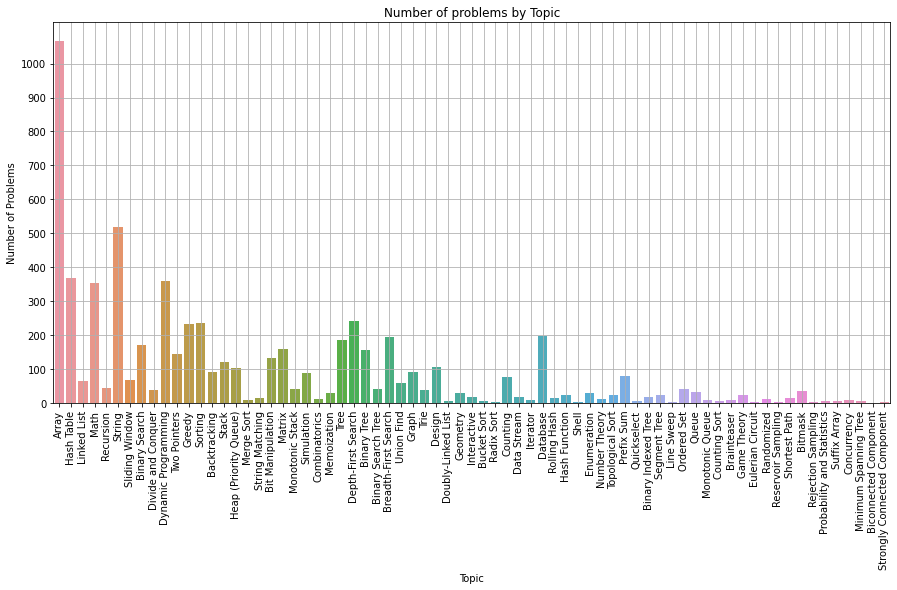

In [195]:
## Number of questions from each topic and each difficulty level
def get_num_ques_by_topic(df):
    topics_dict = {}
    for i in range(len(df)):
        topic_tags = df.iloc[i]['topic_tagged_text']
        for topic in topic_tags:
            if topics_dict.get(topic) is None:
                topics_dict[topic] = 1
            else:
                topics_dict[topic] += 1
    return topics_dict

n_ques_by_topic = get_num_ques_by_topic(df)

# Plotting data
import matplotlib.pyplot as plt
import seaborn as sns

names = list(n_ques_by_topic.keys())
values = list(n_ques_by_topic.values())

fig = plt.figure(figsize=(15,7))
sns.barplot(x=names, y=values)
plt.xticks(rotation=90)
plt.title('Number of problems by Topic')
plt.yticks(np.arange(0,1100,100))
plt.ylabel('Number of Problems')
plt.xlabel('Topic')
plt.grid('--')
plt.show()

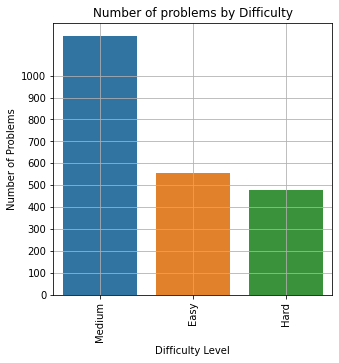

In [235]:
## Number of questions by difficulty level 

diff_dict = dict(df['difficulty'].value_counts())

names = list(diff_dict.keys())
values = list(diff_dict.values())

fig = plt.figure(figsize=(5,5))
sns.barplot(x=names, y=values)
plt.xticks(rotation=90)
plt.title('Number of problems by Difficulty')
plt.yticks(np.arange(0,1100,100))
plt.ylabel('Number of Problems')
plt.xlabel('Difficulty Level')
plt.grid('--')
plt.show()

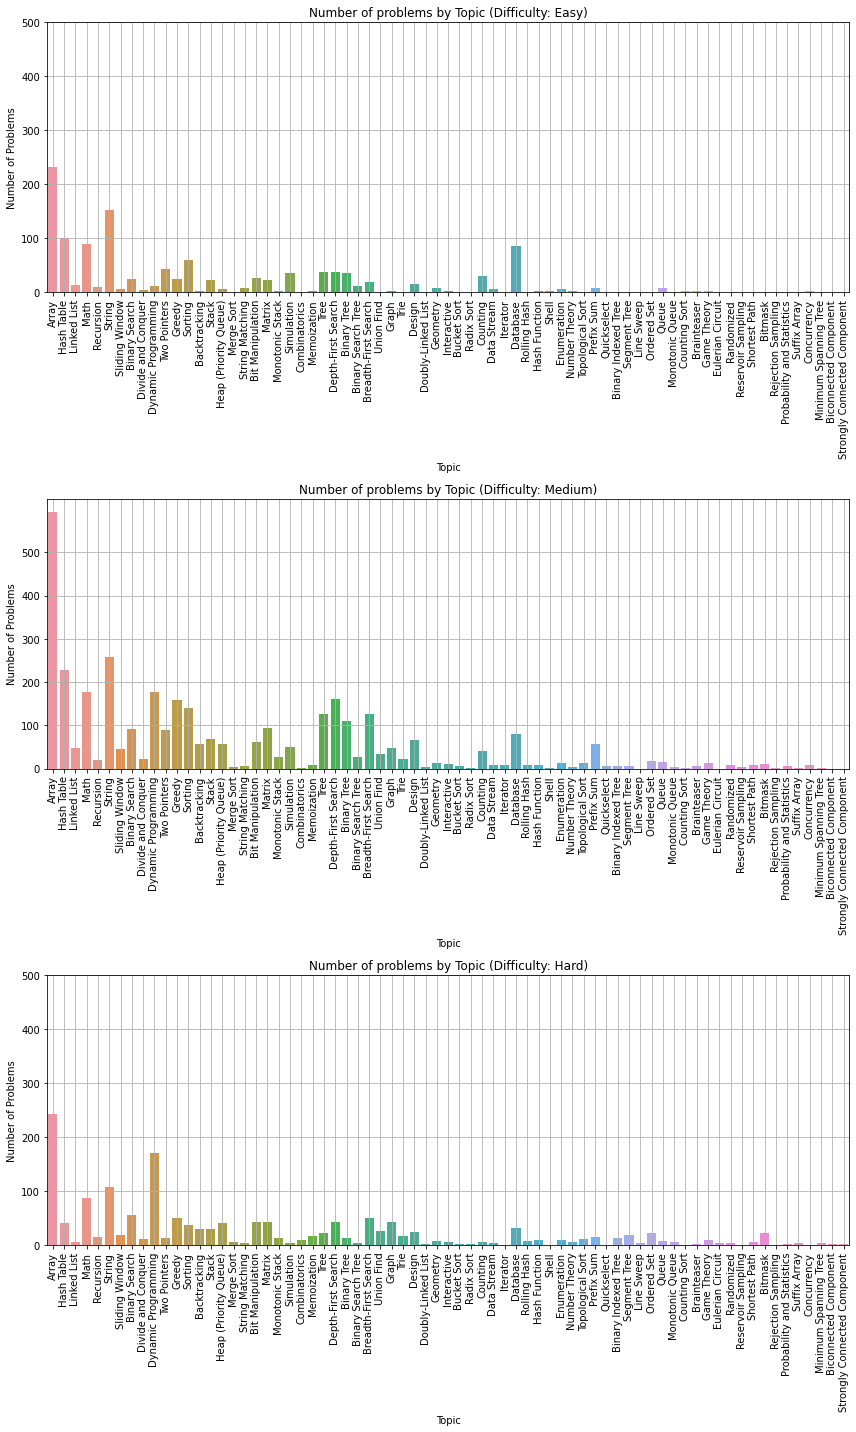

In [256]:
## Number of problems by difficulty and topic
def get_n_ques_by_topic_by_diff(df, n_ques_by_topic_dict):
    final_dict = {}
    final_dict['Medium'] = dict.fromkeys(n_ques_by_topic_dict, 0)
    final_dict['Hard'] = dict.fromkeys(n_ques_by_topic_dict, 0)
    final_dict['Easy'] = dict.fromkeys(n_ques_by_topic_dict, 0)

    for i in range(len(df)):
        topic_tags = df.iloc[i]['topic_tagged_text']
        difficulty = df.iloc[i]['difficulty']
        for topic in topic_tags:
            final_dict[difficulty][topic] += 1
    return final_dict

n_ques_by_topic_by_diff = get_n_ques_by_topic_by_diff(df, n_ques_by_topic)

# Plotting the data:
fig = plt.figure(figsize=(12,20))

fig.add_subplot(3,1,1)
names = list(n_ques_by_topic_by_diff['Easy'].keys())
values = list(n_ques_by_topic_by_diff['Easy'].values())
sns.barplot(x=names, y=values)
plt.xticks(rotation=90)
plt.title('Number of problems by Topic (Difficulty: Easy)')
plt.yticks(np.arange(0,600,100))
plt.ylabel('Number of Problems')
plt.xlabel('Topic')
plt.grid('--')

fig.add_subplot(3,1,2)
names = list(n_ques_by_topic_by_diff['Medium'].keys())
values = list(n_ques_by_topic_by_diff['Medium'].values())
sns.barplot(x=names, y=values)
plt.xticks(rotation=90)
plt.title('Number of problems by Topic (Difficulty: Medium)')
plt.yticks(np.arange(0,600,100))
plt.ylabel('Number of Problems')
plt.xlabel('Topic')
plt.grid('--')

fig.add_subplot(3,1,3)
names = list(n_ques_by_topic_by_diff['Hard'].keys())
values = list(n_ques_by_topic_by_diff['Hard'].values())
sns.barplot(x=names, y=values)
plt.xticks(rotation=90)
plt.title('Number of problems by Topic (Difficulty: Hard)')
plt.yticks(np.arange(0,600,100))
plt.ylabel('Number of Problems')
plt.xlabel('Topic')
plt.grid('--')

plt.tight_layout()
plt.show()

#### Observations from above analysis
We can see that there are some tags that are associated with majority of the problems, And some tags are only associated with very few problems, And we have to predict which problem belongs to which tag, and there can be n number of tags associated with a problem, Thus our problem here is a <b>multilabel classification</b> problem, And the output variable will have n columns, n here is 71.<br/>
Also we would have to do either class balancing with only one set of data, or maybe we can divide the data into two sets, one with most frequently occuring topics, i.e., the topics associated with a lot of problems, and have high number of occurance, Another subset can be the topics that are not really that popular

### 2.	Most Liked/Disliked topics and questions

In [257]:
df_sorted_by_likes = df.sort_values(by = ['likes'], ascending=False)
df_sorted_by_dislikes = df.sort_values(by = ['dislikes'], ascending=False)

In [266]:
# top 10 most liked questions :
print("Top 10 Most Liked Questions")
print(df_sorted_by_likes[['question_title', 'likes']].iloc[:10].reset_index().drop('index', axis=1))

Top 10 Most Liked Questions
                                   question_title  likes
0                                         Two Sum  30564
1  Longest Substring Without Repeating Characters  22404
2                                Maximum Subarray  19399
3                                 Add Two Numbers  17483
4                             Trapping Rain Water  17435
5                                            3Sum  16788
6                   Longest Palindromic Substring  16733
7                     Median of Two Sorted Arrays  15640
8                 Best Time to Buy and Sell Stock  15100
9                       Container With Most Water  15095


In [268]:
# top 10 most liked questions :
print("Top 10 Most Disliked Questions")
print(df_sorted_by_dislikes[['question_title', 'dislikes']].iloc[:10].reset_index().drop('index', axis=1))

Top 10 Most Disliked Questions
                        question_title  dislikes
0         Delete Node in a Linked List     11383
1  Remove Duplicates from Sorted Array      9709
2                      Reverse Integer      9490
3                  Divide Two Integers      9194
4                    Zigzag Conversion      8092
5       Longest Uncommon Subsequence I      5526
6                            Pow(x, n)      5209
7                       Remove Element      5040
8                     Valid Palindrome      4987
9             Integer to English Words      4876


In [310]:
# Topics analysis
# For this analysis we are using to median and mean number of likes for each topic
# Because some topics occur a lot and some dont occur much

def topic_popularity(df_likes, df_dislikes, n_ques_by_topic_dict):
    total_likes = dict.fromkeys(n_ques_by_topic_dict, 0)
    liked_count = dict.fromkeys(n_ques_by_topic_dict, 0)
    median_liked = dict.fromkeys(n_ques_by_topic_dict, [])
    
    total_dislikes = dict.fromkeys(n_ques_by_topic_dict, 0)
    disliked_count = dict.fromkeys(n_ques_by_topic_dict, 0)
    median_disliked = dict.fromkeys(n_ques_by_topic_dict, [])
    
    for i in range(len(df)):
        
        # Likes
        for topic in df_likes['topic_tagged_text'].iloc[i]:
            total_likes[topic] += df_likes['likes'].iloc[i]
            liked_count[topic] += 1
            temp = median_liked[topic].copy()
            temp.append(df_likes['likes'].iloc[i])
            median_liked[topic] = temp
            
        # Dislikes
        for topic in df_dislikes['topic_tagged_text'].iloc[i]:
            total_dislikes[topic] += df_dislikes['dislikes'].iloc[i]
            disliked_count[topic] += 1
            temp = median_disliked[topic].copy()
            temp.append(df_dislikes['dislikes'].iloc[i])
            median_disliked[topic] = temp
    
    # Likes
    average_count_likes = {i:total_likes[i]/liked_count[i] for i in total_likes.keys()}
    median_liked = {i:np.median(median_liked[i]) for i in median_liked.keys()}
    # Sorting by values
    average_count_likes = {k:v for k, v in sorted(average_count_likes.items(), key = lambda item: item[1], reverse=True)}
    median_liked = {k:v for k,v in sorted(median_liked.items(), key = lambda item: item[1], reverse=True)}
    
    # Dislikes
    average_count_dislikes = {i:total_dislikes[i]/disliked_count[i] for i in total_dislikes.keys()}
    median_disliked = {i:np.median(median_disliked[i]) for i in median_disliked.keys()}
    # Sorting by values
    average_count_dislikes = {k:v for k, v in sorted(average_count_dislikes.items(), key = lambda item: item[1], reverse=True)}
    median_disliked = {k:v for k,v in sorted(median_disliked.items(), key = lambda item: item[1], reverse=True)}
    
    return average_count, median_liked, average_count_dislikes, median_disliked
    
average_liked, median_liked, average_disliked, median_disliked = topic_popularity(df_sorted_by_likes,
                                                                                        df_sorted_by_dislikes,
                                                                                        n_ques_by_topic)

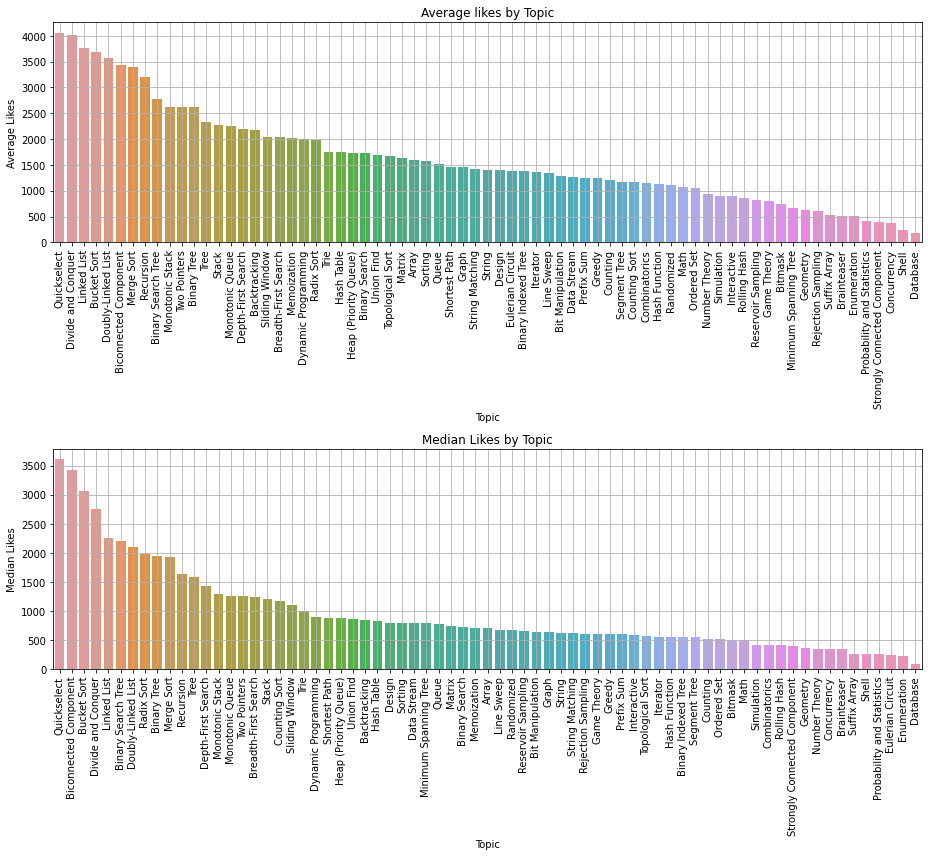

In [311]:
# Plotting the data
fig = plt.figure(figsize=(13,12))

fig.add_subplot(2,1,1)
names = list(average_liked.keys())
values = list(average_liked.values())
sns.barplot(x=names, y=values)
plt.xticks(rotation=90)
plt.title('Average likes by Topic')
plt.ylabel('Average Likes')
plt.xlabel('Topic')
plt.grid('--')

fig.add_subplot(2,1,2)
names = list(median_liked.keys())
values = list(median_liked.values())
sns.barplot(x=names, y=values)
plt.xticks(rotation=90)
plt.title('Median Likes by Topic')
plt.ylabel('Median Likes')
plt.xlabel('Topic')
plt.grid('--')

plt.tight_layout()
plt.show()

#### Observations - Liked topics
<b>Most Liked: </b>For the liked topics, Most liked topics are definitely the popular problems, like quicksort, Divide and conquer, Linked Lists, Arrays etc, As for the median likes, There is a slight change but topics are almost same, Those are the popular algorithms or popular questions<br/>
<b>Least Liked: </b>For the least liked topics, topics like Databses, Enumerations, concurrency, brainteasers, shell are the topics that are least liked, this might be because apart of the Databases, Which is a hot interview topic, others are not very common in interviews, And people do come on these platforms to practice questions for interviews, and also for algorithms and data structures, people dont usually practice on these topics, Thus there would be less traffic on these, Therefore leading to less visits and less likes.

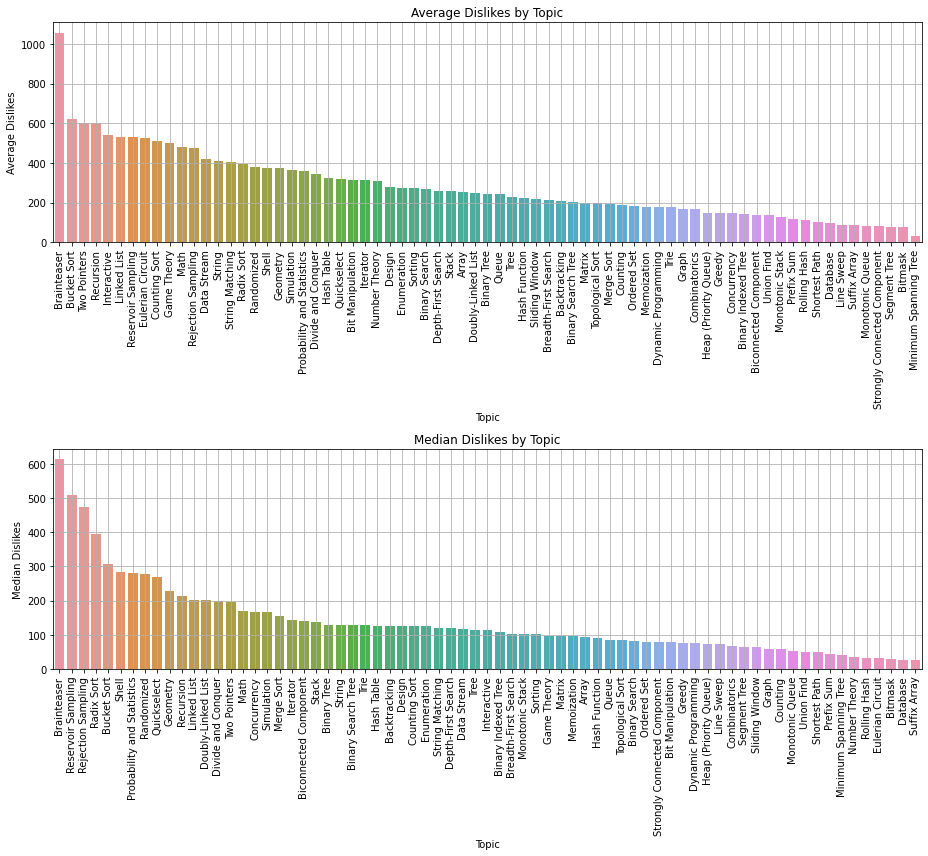

In [312]:
fig = plt.figure(figsize=(13,12))

fig.add_subplot(2,1,1)
names = list(average_disliked.keys())
values = list(average_disliked.values())
sns.barplot(x=names, y=values)
plt.xticks(rotation=90)
plt.title('Average Dislikes by Topic')
plt.ylabel('Average Dislikes')
plt.xlabel('Topic')
plt.grid('--')

fig.add_subplot(2,1,2)
names = list(median_disliked.keys())
values = list(median_disliked.values())
sns.barplot(x=names, y=values)
plt.xticks(rotation=90)
plt.title('Median Dislikes by Topic')
plt.ylabel('Median Dislikes')
plt.xlabel('Topic')
plt.grid('--')

plt.tight_layout()
plt.show()


#### Observations - Disliked topics
<b>Most Disliked: </b>Here we can see that the most disliked topic is brainteasers, bucket sort, sampling questions etc, These might be because either these problems are too easy to solve or practicing those does not make sense, Again this is just an hypothesis, can be true or false
<br/>
From personal experience, I have seen people being very angry on questions which are very straightforward and does not require algorithmic thinking, we can find these in discussions tab, so people do dislike problems which they think does not deserve to be on the platform.
<br/>
<b>Least Disliked: </b>As for least Disliked topics, These can again be topics that are having less traffic, thus less visitors, or these are good problems that a lot of people like, Thus less dislikes.

### 3.	Topics with low/High success rate

In [313]:
## For this analysis we will check the average and median success rate for the topics
def topic_success_rate(df, n_ques_by_topic_dict):
    success_rate = dict.fromkeys(n_ques_by_topic_dict, [])
    
    for i in range(len(df)):
        for topic in df['topic_tagged_text'].iloc[i]:
            temp = success_rate[topic].copy()
            temp.append(df['success_rate'].iloc[i])
            success_rate[topic] = temp
            
    # Likes
    average_succes_rate = {i:np.mean(success_rate[i]) for i in success_rate.keys()}
    median_success_rate = {i:np.median(success_rate[i]) for i in success_rate.keys()}
    # Sorting by values
    average_succes_rate = {k:v for k, v in sorted(average_succes_rate.items(), key = lambda item: item[1], reverse=True)}
    median_success_rate = {k:v for k,v in sorted(median_success_rate.items(), key = lambda item: item[1], reverse=True)}
    
    return average_succes_rate, median_success_rate
    
average_succes_rate, median_success_rate = topic_success_rate(df, n_ques_by_topic)

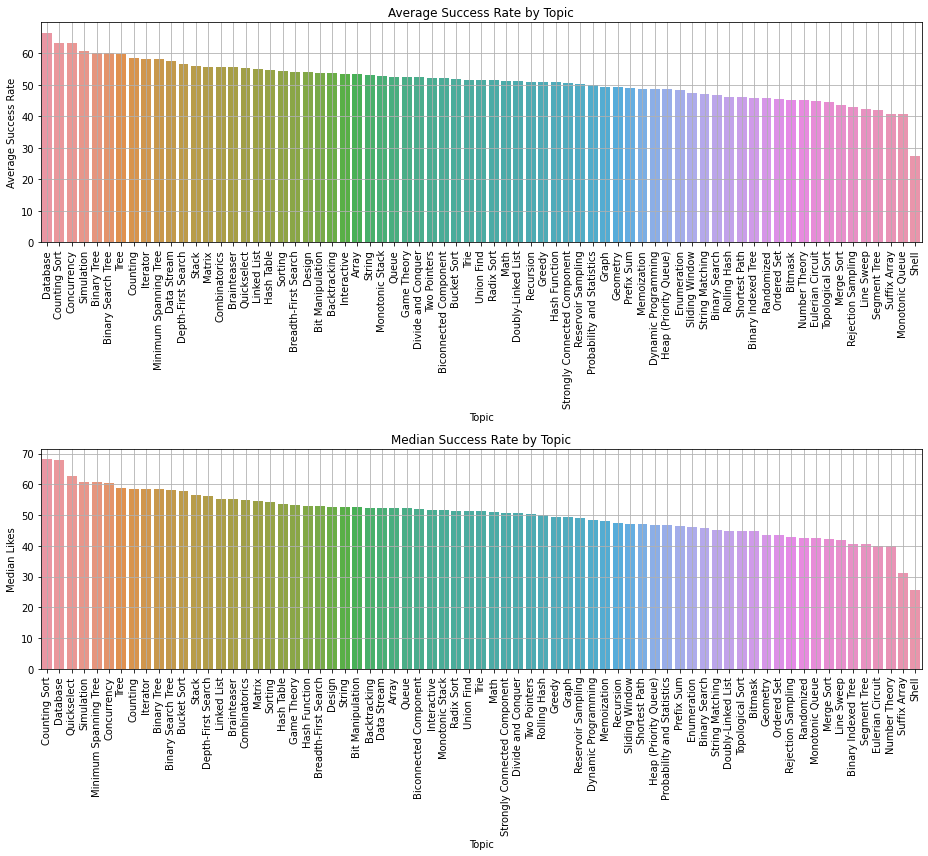

In [314]:
# Plotting the data
fig = plt.figure(figsize=(13,12))

fig.add_subplot(2,1,1)
names = list(average_succes_rate.keys())
values = list(average_succes_rate.values())
sns.barplot(x=names, y=values)
plt.xticks(rotation=90)
plt.title('Average Success Rate by Topic')
plt.ylabel('Average Success Rate')
plt.xlabel('Topic')
plt.grid('--')

fig.add_subplot(2,1,2)
names = list(median_success_rate.keys())
values = list(median_success_rate.values())
sns.barplot(x=names, y=values)
plt.xticks(rotation=90)
plt.title('Median Success Rate by Topic')
plt.ylabel('Median Likes')
plt.xlabel('Topic')
plt.grid('--')

plt.tight_layout()
plt.show()

#### Observations - topic wise success rate
<br/>
Databases have the highest success rate here, Apart from that, basic and common algorithms have the highest success rate, For the topics that have lower success rate we can see that those are the uncommon and complex topics, like shell, eulerian circuits, Also these problems are less in number, Thus these are mostly hard problems that very few poeple solve.

### 4.	Different company’s most frequently asked questions topics

This analysis could not be done as of now because, this is the information that is not publically available/scrapable, This can be viewed only for premium accounts which requires paid subscription to leetcode, Thus this might not be legally available scrapable data as well, Thus we are not touching this topic

### 5.	Most/Least famous topic/questions to solve
For this analysis we can just check the problems that are most liked and least liked, An extended analysis for this would be to check the same data by Difficulty as well.<br/>
For the Topics we already have the plots above which can tell the most and least liked and disliked topics.

In [319]:
print('Most Famous Problem:\n')
print('Question Title : {}\n'.format(df_sorted_by_likes.iloc[0]['question_title']))
print('Question Slug : {}\n'.format(df_sorted_by_likes.iloc[0]['question_slug']))
print('Question : {}\n'.format(df_sorted_by_likes.iloc[0]['question_text']))
print('Total Number of likes : {}\n'.format(df_sorted_by_likes.iloc[0]['likes']))
print('Question Topics : {}'.format(", ".join(df_sorted_by_likes.iloc[0]['topic_tagged_text'])))

Most Famous Problem:

Question Title : Two Sum

Question Slug : two-sum

Question : Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.You may assume that each input would have exactly one solution, and you may not use the same element twice.You can return the answer in any order. 

Total Number of likes : 30564

Question Topics : Array, Hash Table


In [382]:
non_null_rows = [i for i in range(len(df_sorted_by_likes['question_text'])) if not df_sorted_by_likes['question_text'][i] is None]
#df_sorted_by_likes.reset_index(inplace = True)
# df_sorted_by_likes.drop('index', axis=1, inplace=True)
print('Least Famous Problem:\n')
print('Question Title : {}\n'.format(df_sorted_by_likes.iloc[non_null_rows].iloc[-1]['question_title']))
print('Question Slug : {}\n'.format(df_sorted_by_likes.iloc[non_null_rows].iloc[-1]['question_slug']))
print('Question : {}\n'.format(df_sorted_by_likes.iloc[non_null_rows].iloc[-1]['question_text']))
print('Total Number of likes : {}\n'.format(df_sorted_by_likes.iloc[non_null_rows].iloc[-1]['likes']))
print('Question Topics : {}'.format(", ".join(df_sorted_by_likes.iloc[non_null_rows].iloc[-1]['topic_tagged_text'])))

Least Famous Problem:

Question Title : Number of Valid Move Combinations On Chessboard

Question Slug : number-of-valid-move-combinations-on-chessboard

Question : There is an 8 x 8 chessboard containing n pieces (rooks, queens, or bishops). You are given a string array pieces of length n, where pieces[i] describes the type (rook, queen, or bishop) of the ith piece. In addition, you are given a 2D integer array positions also of length n, where positions[i] = [ri, ci] indicates that the ith piece is currently at the 1-based coordinate (ri, ci) on the chessboard.When making a move for a piece, you choose a destination square that the piece will travel toward and stop on. A rook can only travel horizontally or vertically from (r, c) to the direction of (r+1, c), (r-1, c), (r, c+1), or (r, c-1). A queen can only travel horizontally, vertically, or diagonally from (r, c) to the direction of (r+1, c), (r-1, c), (r, c+1), (r, c-1), (r+1, c+1), (r+1, c-1), (r-1, c+1), (r-1, c-1). A bishop ca

<a id='task1'></a>
## Making data ready for Task - Similar problem prediction

In [176]:
## Getting data ready for SIMILAR QUESTION PREDICTION

data_set1 = df.copy()

data_set1['similar_question_slug'] = similar_ques_slugs_final

# Creating similar questions data
def create_similar_questions_data(df):
    indices = np.arange(0,len(df),1)
    similar_questions = []
    for row in range(len(df)):
        
        similar_indices = []
        qid1 = df.iloc[row]['question_id']
        q1 = df.iloc[row]['question_text']
        q1_topics = df.iloc[row]['topic_tagged_text']
        if q1 is None:
            continue
        
        ## Generate dataset for positive label - Question 1 and Question 2 are similar
        for i in df.iloc[row]['similar_question_slug']:
            idx = np.where(df['question_slug'] == i)[0]
            if len(idx) == 0:
                continue
            idx = idx[0]
            q2 = df.iloc[idx]['question_text']
            if q2 is None:
                continue
            q2_topics = df.iloc[idx]['topic_tagged_text']
            qid2 = df.iloc[idx]['question_id']
            similar_questions.append([qid1, qid2, q1, q2, q1_topics, q2_topics, 1])
            similar_indices.append(idx)
            
        # Generating dataset for negative label - Question 1 and Question 2 are not similar
        set_include = set(indices)
        set_remove = set(similar_indices)
        set_include = set_include.difference(set_remove)
        include_idx = list(set_include)
        neg_points_idx = np.random.choice(include_idx, len(similar_indices), replace = False)
        for i in neg_points_idx:
            qid2 = df.iloc[i]['question_id']
            q2 = df.iloc[i]['question_text']
            q2_topics = df.iloc[i]['topic_tagged_text']
            if q2 is None:
                continue
            similar_questions.append([qid1, qid2, q1, q2, q1_topics, q2_topics,  0])
        
    return similar_questions

similar_questions_data = create_similar_questions_data(data_set1)
similar_questions_data_columns = ['q1id', 'q2id', 'question1', 'question2', 'q1_topics', 'q2_topics', 'target']
similar_questions_df = pd.DataFrame(similar_questions_data, columns = similar_questions_data_columns)


## Shuffling 
from sklearn.utils import shuffle
similar_questions_df = shuffle(similar_questions_df)
similar_questions_df.reset_index(inplace = True)
similar_questions_df.drop('index', axis=1, inplace=True)


## Saving the data
## Converting data slightly to make it easier to save and retrieve
similar_questions_df_copy = similar_questions_df.copy()
similar_questions_df_copy['q1_topics'] = list(map(lambda x: ",".join(x), similar_questions_df_copy['q1_topics']))
similar_questions_df_copy['q2_topics'] = list(map(lambda x: ",".join(x), similar_questions_df_copy['q2_topics']))
similar_questions_df_copy.to_csv('similar_question_data_with_topics.csv')
similar_questions_df_copy.head()

,q1id,q2id,question1,question2,q1_topics,q2_topics,target
0,88,1019,You are given two integer arrays nums1 and num...,Given an integer array nums sorted in non-decr...,"Array,Two Pointers,Sorting","Array,Two Pointers,Sorting",1
1,724,2102,"Given an array of integers nums, calculate the...","Given a 0-indexed integer array nums, find the...","Array,Prefix Sum","Array,Prefix Sum",1
2,967,1022,"Given an n x n array of integers matrix, retur...",You are given an m x n integer array grid wher...,"Array,Dynamic Programming,Matrix","Array,Backtracking,Bit Manipulation,Matrix",0
3,300,673,"Given an integer array nums, return the length...","Given an integer array nums, return the number...","Array,Binary Search,Dynamic Programming","Array,Dynamic Programming,Binary Indexed Tree,...",1
4,2280,334,You are given two 0-indexed arrays nums1 and n...,"Given an integer array nums, return true if th...","Array,Binary Search,Divide and Conquer,Binary ...","Array,Greedy",1


### As of now we have the raw data that we can use for creating a classifier for predicting if two questions are similar or not
### Note - I have done basic preprocessing for now, more will be done in individual notebooks for the two problems that we have 
### 1. predicting tags for the questions
### 2. Classifying if questions are similar or not<br/><br/>

<a id='task2'></a>
## Making data ready for Task - Tag Prediction

1. We need to remove all the rows where question text is None
2. Need to remove the company id column as data was not publically available thus the column has no data
3. Need to perform basic preprocessing
4. Save the data
5. Task specific preprocessing will be done in another notebook specific to this task

In [405]:
## 1. Removing all the data which has no question data
## Because this is some infomration that cannot be imputed of filled in any way

df_non_null_rows = [i for i in range(len(df)) if df['question_text'][i] is not None]
df_task1 = df.iloc[df_non_null_rows]
df_task1.head()
df_task1.drop('company_tags', axis =1, inplace =True)

,question_id,question_title,question_slug,question_text,difficulty,success_rate,company_tags,likes,dislikes,hints,similar_questions,total_accepted,total_submissions,topic_tagged_text
0,1,Two Sum,two-sum,Given an array of integers nums and an integer...,Easy,48.4,None,30564,960,[A really brute force way would be to search f...,"[{'title': '3Sum', 'titleSlug': '3sum', 'diffi...",6255310,12924189,"[Array, Hash Table]"
1,2,Add Two Numbers,add-two-numbers,You are given two non-empty linked lists repre...,Medium,38.4,None,17483,3629,[],"[{'title': 'Multiply Strings', 'titleSlug': 'm...",2644334,6888606,"[Linked List, Math, Recursion]"
2,3,Longest Substring Without Repeating Characters,longest-substring-without-repeating-characters,"Given a string s, find the length of the longe...",Medium,32.9,None,22404,1004,[],[{'title': 'Longest Substring with At Most Two...,3109972,9438634,"[Hash Table, String, Sliding Window]"
3,4,Median of Two Sorted Arrays,median-of-two-sorted-arrays,Given two sorted arrays nums1 and nums2 of siz...,Hard,33.9,None,15640,1936,[],[],1312772,3874658,"[Array, Binary Search, Divide and Conquer]"
4,5,Longest Palindromic Substring,longest-palindromic-substring,"Given a string s, return the longest palindrom...",Medium,31.7,None,16733,981,[How can we reuse a previously computed palind...,"[{'title': 'Shortest Palindrome', 'titleSlug':...",1752820,5525765,"[String, Dynamic Programming]"


In [431]:
## We will be using the hints column
## But there are many places where hints are not present, For that we will be using the text - nonexistent
def hints_transform(x):
    if len(x) > 0:
        return x[0]
    else:
        return 'nonexistent'

df_task1['hints_transformed'] = list(map(lambda x: hints_transform(x), df_task1['hints']))
df_task1

C:\Users\rohit\Anaconda3\envs\baseTwo\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,question_id,question_title,question_slug,question_text,difficulty,success_rate,company_tags,likes,dislikes,hints,similar_questions,total_accepted,total_submissions,topic_tagged_text,hints_transformed
0,1,Two Sum,two-sum,Given an array of integers nums and an integer...,Easy,48.4,None,30564,960,[A really brute force way would be to search f...,"[{'title': '3Sum', 'titleSlug': '3sum', 'diffi...",6255310,12924189,"[Array, Hash Table]",A really brute force way would be to search fo...
1,2,Add Two Numbers,add-two-numbers,You are given two non-empty linked lists repre...,Medium,38.4,None,17483,3629,[],"[{'title': 'Multiply Strings', 'titleSlug': 'm...",2644334,6888606,"[Linked List, Math, Recursion]",nonexistent
2,3,Longest Substring Without Repeating Characters,longest-substring-without-repeating-characters,"Given a string s, find the length of the longe...",Medium,32.9,None,22404,1004,[],[{'title': 'Longest Substring with At Most Two...,3109972,9438634,"[Hash Table, String, Sliding Window]",nonexistent
3,4,Median of Two Sorted Arrays,median-of-two-sorted-arrays,Given two sorted arrays nums1 and nums2 of siz...,Hard,33.9,None,15640,1936,[],[],1312772,3874658,"[Array, Binary Search, Divide and Conquer]",nonexistent
4,5,Longest Palindromic Substring,longest-palindromic-substring,"Given a string s, return the longest palindrom...",Medium,31.7,None,16733,981,[How can we reuse a previously computed palind...,"[{'title': 'Shortest Palindrome', 'titleSlug':...",1752820,5525765,"[String, Dynamic Programming]",How can we reuse a previously computed palindr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,2311,Minimum White Tiles After Covering With Carpets,minimum-white-tiles-after-covering-with-carpets,"You are given a 0-indexed binary string floor,...",Hard,31.1,None,217,10,"[Can you think of a DP solution?, Let DP[i][j]...","[{'title': 'Edit Distance', 'titleSlug': 'edit...",5184,16674,"[String, Dynamic Programming, Prefix Sum]",Can you think of a DP solution?
2209,2316,Count Hills and Valleys in an Array,count-hills-and-valleys-in-an-array,You are given a 0-indexed integer array nums. ...,Easy,55.9,None,139,39,"[For each index, could you find the closest no...","[{'title': 'Find Peak Element', 'titleSlug': '...",15062,26955,[Array],"For each index, could you find the closest non..."
2210,2317,Count Collisions on a Road,count-collisions-on-a-road,There are n cars on an infinitely long road. T...,Medium,39.0,None,222,140,[In what circumstances does a moving car not c...,"[{'title': 'Asteroid Collision', 'titleSlug': ...",11113,28479,"[String, Stack]",In what circumstances does a moving car not co...
2211,2318,Maximum Points in an Archery Competition,maximum-points-in-an-archery-competition,Alice and Bob are opponents in an archery comp...,Medium,46.6,None,212,17,"[To obtain points for some certain section x, ...",[{'title': 'Maximum Product of the Length of T...,7261,15588,"[Array, Bit Manipulation, Recursion, Enumeration]","To obtain points for some certain section x, w..."


In [444]:
## Similar Questions text 
## For this we will only be using the similar questions title for simplicity, and combining all into one String

def transform_similar_question_t2(list_of_dicts):
    if len(list_of_dicts) == 0:
        return ["nonexistent", "nonexistent"]
    else:
        ret_string = ""
        difficulty = []
        for i in list_of_dicts:
            ret_string += i['title'] + " "
            difficulty.append(i['difficulty'])
        return [ret_string, list(set(difficulty))]

similar_questions_transformed = list(map(lambda x: transform_similar_question_t2(x), df_task1['similar_questions']))

In [460]:
df_task1['similar_question_text_transformed'] = list(map(lambda x: x, np.array(similar_questions_transformed).T[0]))
df_task1['similar_questions_difficulty'] = list(map(lambda x: ",".join(x) if x!='nonexistent' else 'nonexistent', np.array(similar_questions_transformed).T[1]))

C:\Users\rohit\Anaconda3\envs\baseTwo\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
C:\Users\rohit\Anaconda3\envs\baseTwo\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\rohit\Anaconda3\envs\baseTwo\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple o

In [461]:
df_task1

,question_id,question_title,question_slug,question_text,difficulty,success_rate,company_tags,likes,dislikes,hints,similar_questions,total_accepted,total_submissions,topic_tagged_text,hints_transformed,similar_question_text_transformed,similar_questions_difficulty
0,1,Two Sum,two-sum,Given an array of integers nums and an integer...,Easy,48.4,None,30564,960,[A really brute force way would be to search f...,"[{'title': '3Sum', 'titleSlug': '3sum', 'diffi...",6255310,12924189,"[Array, Hash Table]",A really brute force way would be to search fo...,3Sum 4Sum Two Sum II - Input Array Is Sorted T...,"Easy,Medium"
1,2,Add Two Numbers,add-two-numbers,You are given two non-empty linked lists repre...,Medium,38.4,None,17483,3629,[],"[{'title': 'Multiply Strings', 'titleSlug': 'm...",2644334,6888606,"[Linked List, Math, Recursion]",nonexistent,Multiply Strings Add Binary Sum of Two Integer...,"Easy,Medium"
2,3,Longest Substring Without Repeating Characters,longest-substring-without-repeating-characters,"Given a string s, find the length of the longe...",Medium,32.9,None,22404,1004,[],[{'title': 'Longest Substring with At Most Two...,3109972,9438634,"[Hash Table, String, Sliding Window]",nonexistent,Longest Substring with At Most Two Distinct Ch...,"Hard,Medium"
3,4,Median of Two Sorted Arrays,median-of-two-sorted-arrays,Given two sorted arrays nums1 and nums2 of siz...,Hard,33.9,None,15640,1936,[],[],1312772,3874658,"[Array, Binary Search, Divide and Conquer]",nonexistent,nonexistent,nonexistent
4,5,Longest Palindromic Substring,longest-palindromic-substring,"Given a string s, return the longest palindrom...",Medium,31.7,None,16733,981,[How can we reuse a previously computed palind...,"[{'title': 'Shortest Palindrome', 'titleSlug':...",1752820,5525765,"[String, Dynamic Programming]",How can we reuse a previously computed palindr...,Shortest Palindrome Palindrome Permutation Pal...,"Hard,Medium,Easy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,2311,Minimum White Tiles After Covering With Carpets,minimum-white-tiles-after-covering-with-carpets,"You are given a 0-indexed binary string floor,...",Hard,31.1,None,217,10,"[Can you think of a DP solution?, Let DP[i][j]...","[{'title': 'Edit Distance', 'titleSlug': 'edit...",5184,16674,"[String, Dynamic Programming, Prefix Sum]",Can you think of a DP solution?,Edit Distance,Hard
2209,2316,Count Hills and Valleys in an Array,count-hills-and-valleys-in-an-array,You are given a 0-indexed integer array nums. ...,Easy,55.9,None,139,39,"[For each index, could you find the closest no...","[{'title': 'Find Peak Element', 'titleSlug': '...",15062,26955,[Array],"For each index, could you find the closest non...",Find Peak Element Monotonic Array Minimum Subs...,"Easy,Medium"
2210,2317,Count Collisions on a Road,count-collisions-on-a-road,There are n cars on an infinitely long road. T...,Medium,39.0,None,222,140,[In what circumstances does a moving car not c...,"[{'title': 'Asteroid Collision', 'titleSlug': ...",11113,28479,"[String, Stack]",In what circumstances does a moving car not co...,Asteroid Collision Car Fleet Last Moment Befor...,"Hard,Medium"
2211,2318,Maximum Points in an Archery Competition,maximum-points-in-an-archery-competition,Alice and Bob are opponents in an archery comp...,Medium,46.6,None,212,17,"[To obtain points for some certain section x, ...",[{'title': 'Maximum Product of the Length of T...,7261,15588,"[Array, Bit Manipulation, Recursion, Enumeration]","To obtain points for some certain section x, w...",Maximum Product of the Length of Two Palindrom...,Medium


In [465]:
## Converting the target lavel to String in order to save it as csv
## Further we will be converting it to n different columns for multilabel classification

df_task1['target'] = list(map(lambda x: ",".join(x), df_task1['topic_tagged_text']))

C:\Users\rohit\Anaconda3\envs\baseTwo\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Note
As of now we have transformed the data into some usable format, any further preprocessing and analysis will be done on another notebook specific to this task - <b>predicting tags</b>

In [467]:
## removing columns that we have already transformed
df_task1_final = df_task1.drop(['hints', 'similar_questions', 'topic_tagged_text', 'company_tags'], axis=1)
df_task1_final.head()

,question_id,question_title,question_slug,question_text,difficulty,success_rate,likes,dislikes,total_accepted,total_submissions,hints_transformed,similar_question_text_transformed,similar_questions_difficulty,target
0,1,Two Sum,two-sum,Given an array of integers nums and an integer...,Easy,48.4,30564,960,6255310,12924189,A really brute force way would be to search fo...,3Sum 4Sum Two Sum II - Input Array Is Sorted T...,"Easy,Medium","Array,Hash Table"
1,2,Add Two Numbers,add-two-numbers,You are given two non-empty linked lists repre...,Medium,38.4,17483,3629,2644334,6888606,nonexistent,Multiply Strings Add Binary Sum of Two Integer...,"Easy,Medium","Linked List,Math,Recursion"
2,3,Longest Substring Without Repeating Characters,longest-substring-without-repeating-characters,"Given a string s, find the length of the longe...",Medium,32.9,22404,1004,3109972,9438634,nonexistent,Longest Substring with At Most Two Distinct Ch...,"Hard,Medium","Hash Table,String,Sliding Window"
3,4,Median of Two Sorted Arrays,median-of-two-sorted-arrays,Given two sorted arrays nums1 and nums2 of siz...,Hard,33.9,15640,1936,1312772,3874658,nonexistent,nonexistent,nonexistent,"Array,Binary Search,Divide and Conquer"
4,5,Longest Palindromic Substring,longest-palindromic-substring,"Given a string s, return the longest palindrom...",Medium,31.7,16733,981,1752820,5525765,How can we reuse a previously computed palindr...,Shortest Palindrome Palindrome Permutation Pal...,"Hard,Medium,Easy","String,Dynamic Programming"


In [468]:
df_task1_final.to_csv('data_raw_tag_prediction.csv', index=False)

## Note -

We have the data processed for both the tasks now, Let go ahead with those tasks in different notebooks